In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Importing Data

We are going to import the data from `final_zillow.xlsx` to perform further analysis

In [14]:
df_raw = pd.read_excel('final_zillow.xlsx', skiprows = 1)

In [15]:
df_raw.head()

,Street Address,City,County,State,Country,Zipcode,Ziilow Id,Property Url,Bedrooms,Bathrooms,...,Listing Type,Agent Name,Agent Phone Number,Agent Email,Agent License Number,Agency,MLS ID,MLS Name,HOA Fee,Pictures
0,829 W 66th St,Los Angeles,Los Angeles County,CA,USA,90044,20934009,https://www.zillow.com/homedetails/829-W-66th-...,3,1,...,Unknown Listed By,Lillie Reda,323-747-3640,lilliec1@att.net,DRE #01084559,Excellence Real Estate,DW22007910,CRMLS,NaN,https://photos.zillowstatic.com/fp/a0f5b38d972...
1,9673 Via Torino #154,Burbank,Los Angeles County,CA,USA,91504,20033668,https://www.zillow.com/homedetails/9673-Via-To...,2,2,...,For Rent,NaN,NaN,jerry@teamrockproperties.com,NaN,NaN,NaN,Zillow Rental Manager,$439 monthly,https://photos.zillowstatic.com/fp/22c59ef7419...
2,9673 Via Torino,Burbank,Los Angeles County,CA,USA,91504,2088531295,https://www.zillow.com/homedetails/9673-Via-To...,2,1.5,...,Unknown Listed By,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://photos.zillowstatic.com/fp/c960fd9b761...
3,13621 Simshaw Ave,Sylmar,Los Angeles County,CA,USA,91342,20102436,https://www.zillow.com/homedetails/13621-Simsh...,3,2,...,Unknown Listed By,Audrey Overton,NaN,audrey@audreyoverton.com,DRE #02007589,Century 21 Everest,SR22032355,CRMLS,NaN,https://photos.zillowstatic.com/fp/f41d7ed87a0...
4,4600 Don Lorenzo Dr APT 30,Los Angeles,Los Angeles County,CA,USA,90008,61361676,https://www.zillow.com/homedetails/4600-Don-Lo...,2,3,...,Unknown Listed By,Stefanie Mcintyre,818-321-6522,soldbystefanie@kw.com,DRE # 01874509,KW Advisors,22-117173,CLAW,$404 monthly,https://photos.zillowstatic.com/fp/6a763dd674b...


In [16]:
print(df_raw.info)
print(df_raw.columns)

<bound method DataFrame.info of                    Street Address         City              County State  \
0                   829 W 66th St  Los Angeles  Los Angeles County    CA   
1            9673 Via Torino #154      Burbank  Los Angeles County    CA   
2                 9673 Via Torino      Burbank  Los Angeles County    CA   
3               13621 Simshaw Ave       Sylmar  Los Angeles County    CA   
4      4600 Don Lorenzo Dr APT 30  Los Angeles  Los Angeles County    CA   
...                           ...          ...                 ...   ...   
34392           23701 Archwood St   West Hills  Los Angeles County    CA   
34393     3944 Kentucky Dr APT 13  Los Angeles  Los Angeles County    CA   
34394            6539 Blucher Ave     Van Nuys  Los Angeles County    CA   
34395        1912 W Santa Cruz St    San Pedro  Los Angeles County    CA   
34396               20807 Vose St     Winnetka  Los Angeles County    CA   

      Country Zipcode   Ziilow Id  \
0         USA   90

In [17]:
df = df_raw[['Street Address', 'City', 'County', 'State', 'Country', \
             'Zipcode', 'Days On Zillow', 'Latitude', 'Longitude']]

In [18]:
df = df.dropna()
df.drop(df.index[df['Days On Zillow'] == '--'], inplace=True)
df.drop(df.index[df['Latitude'] == '--'], inplace=True)
df.drop(df.index[df['Longitude'] == '--'], inplace=True)
print(len(df))

34384


In [19]:
df.head()

,Street Address,City,County,State,Country,Zipcode,Days On Zillow,Latitude,Longitude
0,829 W 66th St,Los Angeles,Los Angeles County,CA,USA,90044,3,33.97944,-118.2882
1,9673 Via Torino #154,Burbank,Los Angeles County,CA,USA,91504,3,34.21074,-118.34243
2,9673 Via Torino,Burbank,Los Angeles County,CA,USA,91504,3,34.21074,-118.34243
3,13621 Simshaw Ave,Sylmar,Los Angeles County,CA,USA,91342,4,34.31926,-118.41328
4,4600 Don Lorenzo Dr APT 30,Los Angeles,Los Angeles County,CA,USA,90008,4,34.000793,-118.35638


In [20]:
df = df.astype({'Days On Zillow': 'int32', 'Latitude': 'float', 'Longitude': 'float'})

In [22]:
df_groupby_city = df[['City','Days On Zillow']].groupby('City').mean()
df_groupby_city.head(20)

,Days On Zillow
City,
Arleta,240.750000
Baldwin Hills,296.000000
Beverly Hills,188.237288
Beverly hills,315.000000
Box Canyon,214.000000
Burbank,170.062500
CHATSWORTH,326.000000
Canoga Park,187.303859
Century City,154.000000


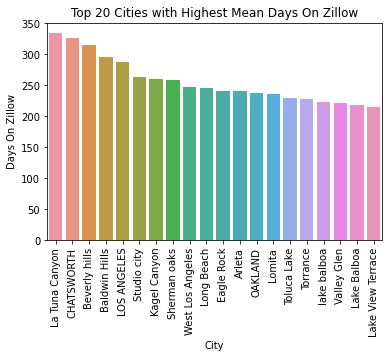

In [23]:
df_groupby_city_sorted = df_groupby_city.sort_values(by = 'Days On Zillow', ascending = False)
sns.barplot(x = df_groupby_city_sorted.index[:20], \
            y = df_groupby_city_sorted['Days On Zillow'][:20])
plt.xticks(rotation = 90)
plt.title('Top 20 Cities with Highest Mean Days On Zillow')
plt.show()

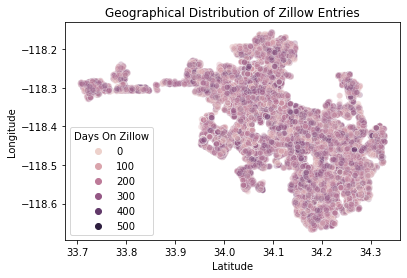

In [24]:
ax = sns.scatterplot(x = 'Latitude', y = 'Longitude', hue = 'Days On Zillow', alpha = 0.3, data = df)
plt.title('Geographical Distribution of Zillow Entries')
plt.show()